### ESSEMBLE MODEL

### 1 - 3

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load stock price data
data = pd.read_csv('google.csv')

# Convert 'date' column to datetime and 'close' column to prices
data['date'] = pd.to_datetime(data['date'])
dates = data['date']
prices = data['close']

# Create lag features for the target variable
data['next_day_close'] = data['close'].shift(-1)
data.dropna(inplace=True)

# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['close', 'next_day_close']])
test_scaled = scaler.transform(test_data[['close', 'next_day_close']])

# Fit ARIMA model
arima_order = (1, 2, 5)
arima_model = ARIMA(train_scaled[:, 0], order=arima_order)
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=len(test_scaled))

# Create and fit XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(train_scaled[:, 0:1], train_scaled[:, 1])
xgb_forecast = xgb_model.predict(test_scaled[:, 0:1])

# Create and fit LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

input_shape = (train_scaled.shape[1], 1)  # Reshape input for LSTM
lstm_model = create_lstm_model(input_shape)
lstm_model.fit(np.expand_dims(train_scaled[:, 0], axis=1), train_scaled[:, 1], epochs=50, batch_size=16)
lstm_forecast = lstm_model.predict(np.expand_dims(test_scaled[:, 0], axis=1)).flatten()

# Calculate ensemble forecast by averaging predictions
ensemble_forecast = (arima_forecast + xgb_forecast + lstm_forecast) / 3

# Inverse transform scaled data to get actual prices
ensemble_forecast = scaler.inverse_transform(np.column_stack((test_scaled[:, 0], ensemble_forecast)))[:, 1]



# Calculate RMSE, MAE, and R-squared for ensemble forecast
ensemble_rmse = np.sqrt(mean_squared_error(test_data['next_day_close'], ensemble_forecast))
ensemble_mae = mean_absolute_error(test_data['next_day_close'], ensemble_forecast)
ensemble_r_squared = r2_score(test_data['next_day_close'], ensemble_forecast)

# Print evaluation metrics
print('Ensemble Root Mean Squared Error (RMSE):', ensemble_rmse)
print('Ensemble Mean Absolute Error (MAE):', ensemble_mae)
print('Ensemble R-squared:', ensemble_r_squared)


C:\Users\Gifty Aiyegbeni\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Epoch 1/50
63/63 [==============================] - 2s 2ms/step - loss: 0.1577
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0422
Epoch 3/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 4/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0134
Epoch 5/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 6/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 9/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 10/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 11/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 12/50
63/63 [==============================] - 0s 2ms/step - loss: 9.7583e-04
Epoch 13/50
63/63 [==========================

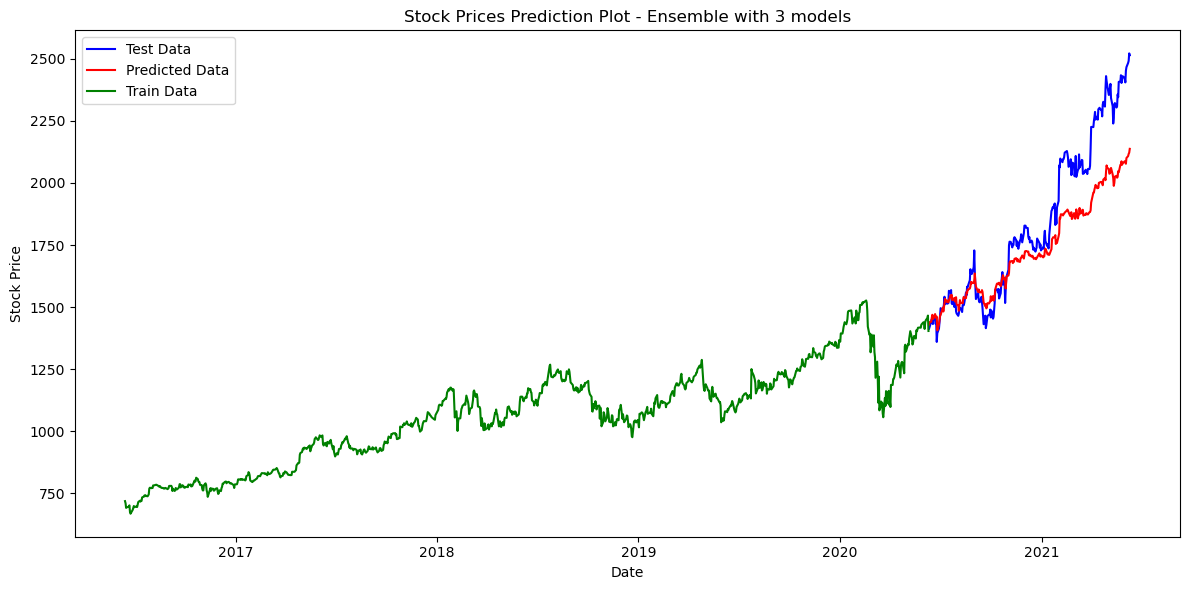

In [6]:

# Plot test, train, and predictions with years on x-axis
plt.figure(figsize=(12, 6))
plt.plot(test_data['date'], test_data['next_day_close'], label='Test Data', color='blue')
plt.plot(test_data['date'], ensemble_forecast, label='Predicted Data', color='red')
plt.plot(train_data['date'], train_data['next_day_close'], label='Train Data', color='green')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Prices Prediction Plot - Ensemble with 3 models')
plt.legend()
plt.tight_layout()
plt.show()

### 2 - 2

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load stock price data
data = pd.read_csv('google.csv')

# Convert 'date' column to datetime and 'close' column to prices
data['date'] = pd.to_datetime(data['date'])
dates = data['date']
prices = data['close']

# Create lag features for the target variable
data['next_day_close'] = data['close'].shift(-1)
data.dropna(inplace=True)

# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['close', 'next_day_close']])
test_scaled = scaler.transform(test_data[['close', 'next_day_close']])

# Create and fit XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(train_scaled[:, 0:1], train_scaled[:, 1])
xgb_forecast = xgb_model.predict(test_scaled[:, 0:1])

# Create and fit LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

input_shape = (train_scaled.shape[1], 1)  # Reshape input for LSTM
lstm_model = create_lstm_model(input_shape)
lstm_model.fit(np.expand_dims(train_scaled[:, 0], axis=1), train_scaled[:, 1], epochs=50, batch_size=16)
lstm_forecast = lstm_model.predict(np.expand_dims(test_scaled[:, 0], axis=1)).flatten()

# Calculate ensemble forecast by averaging predictions
ensemble_forecast = (xgb_forecast + lstm_forecast) / 2

# Inverse transform scaled data to get actual prices
ensemble_forecast = scaler.inverse_transform(np.column_stack((test_scaled[:, 0], ensemble_forecast)))[:, 1]

# Calculate RMSE, MAE, and R-squared for ensemble forecast
ensemble_rmse = np.sqrt(mean_squared_error(test_data['next_day_close'], ensemble_forecast))
ensemble_mae = mean_absolute_error(test_data['next_day_close'], ensemble_forecast)
ensemble_r_squared = r2_score(test_data['next_day_close'], ensemble_forecast)

# Print evaluation metrics
print('Ensemble Root Mean Squared Error (RMSE):', ensemble_rmse)
print('Ensemble Mean Absolute Error (MAE):', ensemble_mae)
print('Ensemble R-squared:', ensemble_r_squared)



Epoch 1/50
63/63 [==============================] - 2s 2ms/step - loss: 0.2020
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 0.1018
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0366
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0165
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 9/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 10/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 11/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 12/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 13/50
63/63 [==============================

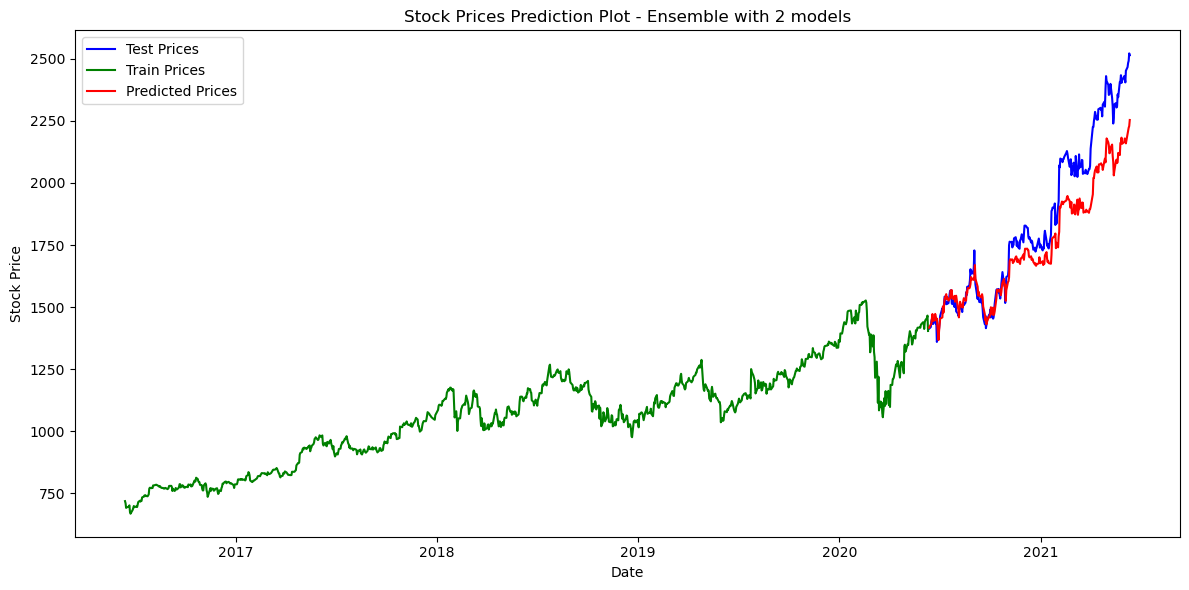

In [36]:
# Plot actual, train, and predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(dates[train_size+1:], test_data['next_day_close'], label='Test Prices', color='blue')
plt.plot(dates[:train_size], train_data['next_day_close'], label='Train Prices', color='green')
plt.plot(dates[train_size+1:], ensemble_forecast, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Prices Prediction Plot - Ensemble with 2 models')
plt.legend()
plt.tight_layout()
plt.show()
